In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [46]:
df =pd.read_csv(url,header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


 LINEAR AND MULTIPLE LINEAR REGRESSION

  1. Simple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
# create a linear regression object
lr=LinearRegression()
lr

LinearRegression()

In [49]:
x = df[['highway-mpg']]
y = df['price']


In [50]:
lr.fit(x,y)

LinearRegression()

In [51]:
y1=lr.predict(x)
y1[0:7]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011])

In [52]:
lr.intercept_

38423.3058581574

In [53]:
lr.coef_

array([-821.73337832])

   2. Multiple Linear Regression

In [54]:
 z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
lr.fit(z, df['price'])

LinearRegression()

In [55]:
lr.intercept_

-15806.624626329198

In [56]:
lr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

2. MODEL EVALUATION USING VISUALIZATION

In [57]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='highway-mpg', ylabel='price'>

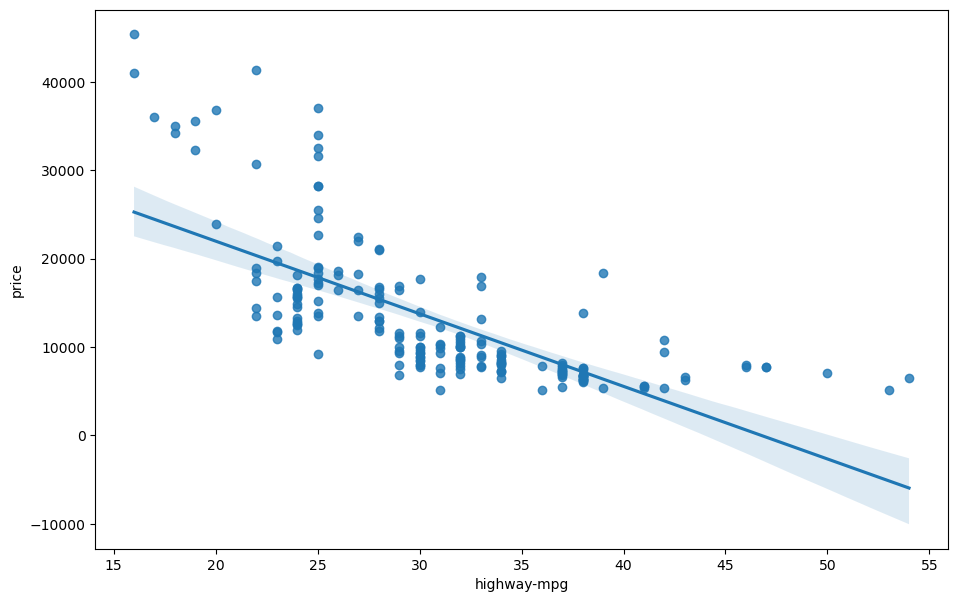

In [58]:

width = 11
height = 7
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price', data = df)

Residual Plot

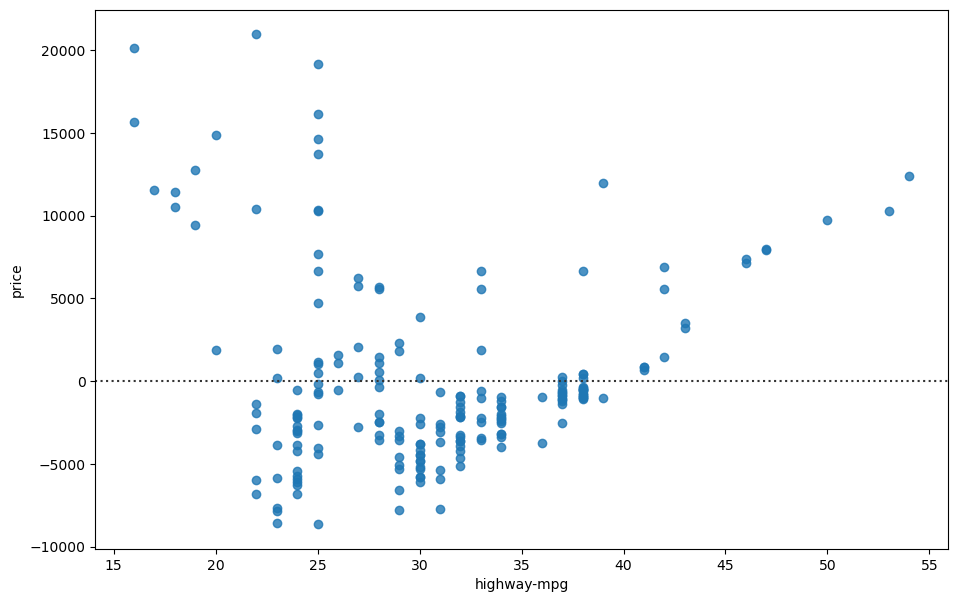

In [59]:

width = 11
height = 7
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

 POLYNOMIAL REGRESSION

In [60]:
# A FUNCTION TO PLOT THE POLYNOMIAL REGRESSION

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [61]:
x = df['highway-mpg']
y = df['price']


In [62]:
# fit the model using the polyfit() function then use the poly1d to display the polynomial function
# We use the 3rd degree polynomial

f= np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


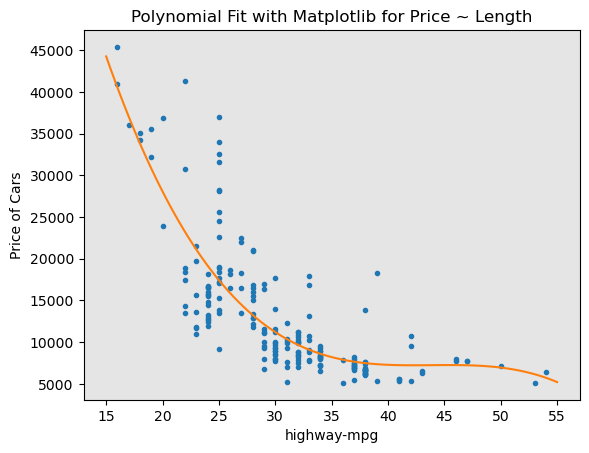

In [63]:
# plot the function using the plotpolly function

PlotPolly(p,x,y,'highway-mpg')

In [64]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

PIPELINE

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
